# Fundamentos de Data Science
### Analizando la Satisfacción de Clientes en la Industria Hotelera

1. Limpieza de datos con Python:

In [31]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Cargamos el dataframe
df = pd.read_csv('C:/Users/arace/OneDrive/Documentos/Mavi/data/hotel_bookings.csv')

* Exploramos los datos y verificamos metricas iniciales

In [33]:
#Verificamos la primeras 5 columnas del DataFrame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [34]:
#Verificamos los utimas 5 filas del DataFrame
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [35]:
#Verificamps informacion del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [36]:
#Verificamos metricas inciales del DataFrame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [37]:
#Verificamos los tipos de datos con que estamos trabajando
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

* Exploramos valores nulos, repedido y atipicos

In [38]:
#Verificamos valores nulos 1
print(df.shape)
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

(119390, 32)


,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
arrival_date_month,119390,0,0.00
arrival_date_week_number,119390,0,0.00
lead_time,119390,0,0.00
is_canceled,119390,0,0.00
stays_in_weekend_nights,119390,0,0.00
stays_in_week_nights,119390,0,0.00


In [39]:
# Eliminamos la columna 'company' 
df.drop('company', axis=1, inplace=True)


In [40]:
#Verificamos valores nulos 2
print(df.shape)
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

(119390, 31)


,datos sin NAs en q,Na en q,Na en %
agent,103050,16340,13.69
country,118902,488,0.41
is_canceled,119390,0,0.00
arrival_date_year,119390,0,0.00
arrival_date_month,119390,0,0.00
arrival_date_week_number,119390,0,0.00
hotel,119390,0,0.00
arrival_date_day_of_month,119390,0,0.00
stays_in_weekend_nights,119390,0,0.00
adults,119390,0,0.00


In [41]:
#Verificamos las metrica de las datos faltantes, para comparar la variacion despues de completar los datos faltantes
agent_mean = df['agent'].mean()
print(f"Promedio de 'agent' antes de imputacion: {agent_mean}")

Promedio de 'agent' antes de imputacion: 86.69338185346919


In [42]:
# Llenamos valores de Agent anc Country en base a la relacion que tienes las columnas, en filas con datos similares
df['agent'] = df['agent'].fillna(df.groupby('country')['agent'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [43]:
# Verificamos el promedio despues de la imputacion
agent_mean2 = df['agent'].mean()
print(f"Promedio de 'agent' despues de imputacion: {agent_mean2}")

Promedio de 'agent' despues de imputacion: 75.88704095689279


In [44]:
#Verificamos valores nulos 3
print(df.shape)
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

(119390, 31)


,datos sin NAs en q,Na en q,Na en %
country,118902,488,0.41
agent,119052,338,0.28
is_canceled,119390,0,0.00
arrival_date_year,119390,0,0.00
arrival_date_month,119390,0,0.00
arrival_date_week_number,119390,0,0.00
hotel,119390,0,0.00
arrival_date_day_of_month,119390,0,0.00
stays_in_weekend_nights,119390,0,0.00
adults,119390,0,0.00


In [45]:
#Rellenamos los otros valores con un parametro neutro, de manera a no eliminar la columa completa o las filas que contengan al menos un valor nulo

# Usamos un valor numerico para rellenar Agent. De lo contrario tenemos un error
df['agent'] = df['agent'].fillna(-1)
df['country'] = df['country'].fillna('No disponible')

In [46]:
# Eliminamos las filas con valores nulos en Children
df = df.dropna(subset=['children'])

In [47]:
#Verificamos valores nulos 4
print(df.shape)
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

(119386, 31)


,datos sin NAs en q,Na en q,Na en %
hotel,119386,0,0.0
is_canceled,119386,0,0.0
lead_time,119386,0,0.0
arrival_date_year,119386,0,0.0
arrival_date_month,119386,0,0.0
arrival_date_week_number,119386,0,0.0
arrival_date_day_of_month,119386,0,0.0
stays_in_weekend_nights,119386,0,0.0
stays_in_week_nights,119386,0,0.0
adults,119386,0,0.0


In [48]:
#Verificamos duplicados
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119386, dtype: bool

In [49]:
#Verificamos el DataFrame una ves mas
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


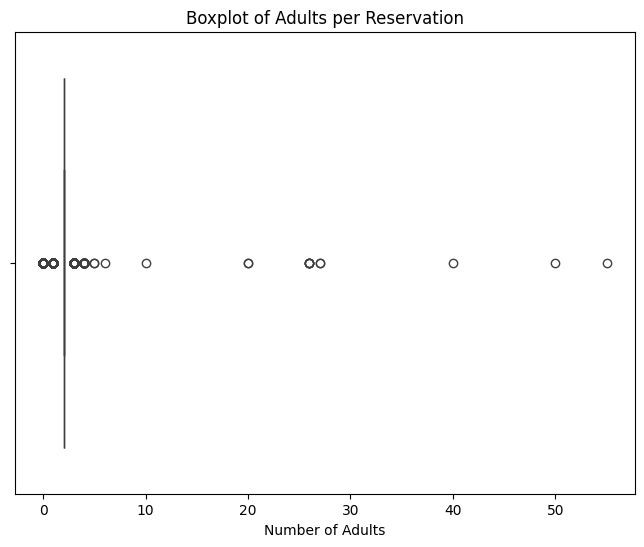

In [50]:
# Deteactar valores atipicos
# Verificamos los valores de la columna Adults
plt.figure(figsize=(8,6))
sns.boxplot(x=df['adults'])
plt.title('Boxplot of Adults per Reservation')
plt.xlabel('Number of Adults')
plt.show()

In [51]:
# Verificamos el valor maximo actual
df['adults'].max()

np.int64(55)

In [52]:
# Removemos los valores que pasan el limite superior/ demasiado dramatico / eliminar solo los valores por encima de 10
# Calculando los outliers de la columna adultos eiminamos muchos datos del Data Frame. Por lo vamos a cortar los datos para categoria adultos con mas 10 personas en la room. 

nuevo_df = df[df['adults'] <= 10]


In [53]:
# Verificamos datos del nuevo data frame
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119374 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119374 non-null  object 
 1   is_canceled                     119374 non-null  int64  
 2   lead_time                       119374 non-null  int64  
 3   arrival_date_year               119374 non-null  int64  
 4   arrival_date_month              119374 non-null  object 
 5   arrival_date_week_number        119374 non-null  int64  
 6   arrival_date_day_of_month       119374 non-null  int64  
 7   stays_in_weekend_nights         119374 non-null  int64  
 8   stays_in_week_nights            119374 non-null  int64  
 9   adults                          119374 non-null  int64  
 10  children                        119374 non-null  float64
 11  babies                          119374 non-null  int64  
 12  meal                 

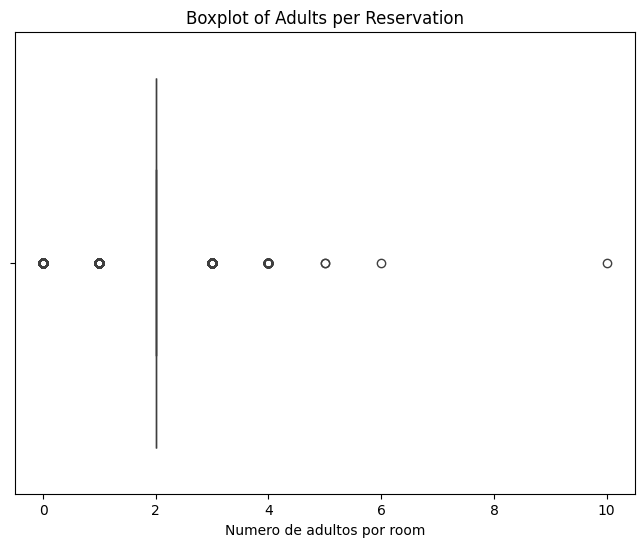

In [54]:
# Verificamos los valores de la columna Adults despues de eliminar los valores que consideramos muy altos
plt.figure(figsize=(8,6))
sns.boxplot(x=nuevo_df['adults'])
plt.title('Boxplot of Adults per Reservation')
plt.xlabel('Numero de adultos por room')
plt.show()

In [55]:
# Verificampos el valor maximo
nuevo_df['adults'].max()

np.int64(10)

In [56]:
# Verificamos el dataframe
nuevo_df.head()

#Podemos ver que solo hemos eliminado 12 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [58]:
#Verificamos valores nulos 4 en el nuevo Data Frame
print(nuevo_df.shape)
qsna=nuevo_df.shape[0]-nuevo_df.isnull().sum(axis=0)
qna=nuevo_df.isnull().sum(axis=0)
ppna=round(100*(nuevo_df.isnull().sum(axis=0)/nuevo_df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

(119374, 31)


,datos sin NAs en q,Na en q,Na en %
hotel,119374,0,0.0
is_canceled,119374,0,0.0
lead_time,119374,0,0.0
arrival_date_year,119374,0,0.0
arrival_date_month,119374,0,0.0
arrival_date_week_number,119374,0,0.0
arrival_date_day_of_month,119374,0,0.0
stays_in_weekend_nights,119374,0,0.0
stays_in_week_nights,119374,0,0.0
adults,119374,0,0.0


2. Exploración de datos con Python:

* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


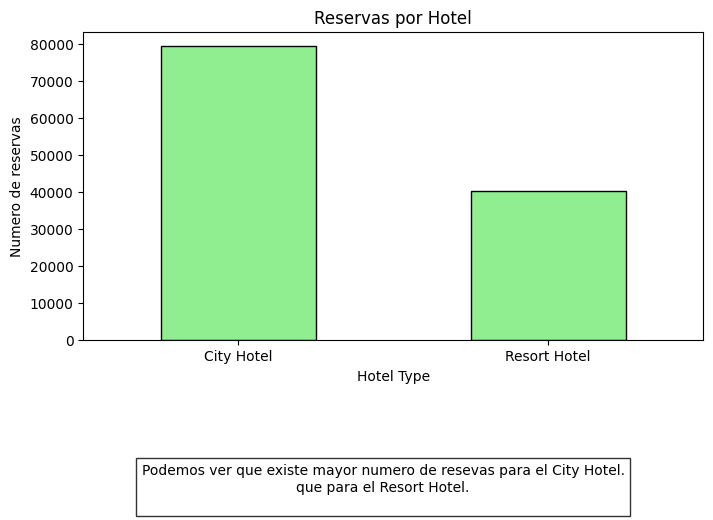

In [104]:
# Visilizamos el tipo de hotel con repecto a la catidad de reservas
hotel_counts = df['hotel'].value_counts()

plt.figure(figsize=(8, 4))
hotel_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Reservas por Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Numero de reservas')
plt.xticks(rotation=0)

plt.figtext(0.5, -0.2,  # x=0.5 for center alignment, y=-0.2 to position it below the plot
            'Podemos ver que existe mayor numero de resevas para el City Hotel.\n'
            'que para el Resort Hotel.\n',
            fontsize=10, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.8))
plt.show()

#Codigo base: Coding dojo, visualizaciones avanzadas


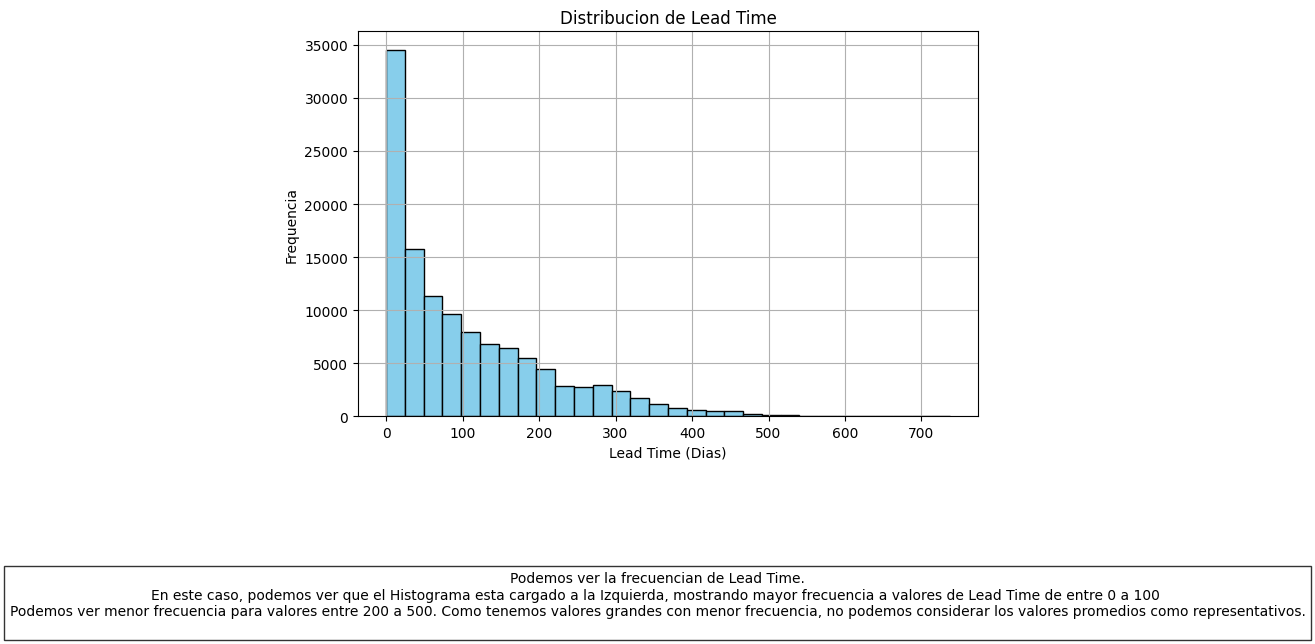

In [99]:
# Visualizamos la Distribucion de Lead Time
plt.figure(figsize=(8, 5))
plt.hist(df['lead_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribucion de Lead Time')
plt.xlabel('Lead Time (Dias)')
plt.ylabel('Frequencia')
plt.grid(True)

plt.figtext(0.5, -0.2,  # x=0.5 for center alignment, y=-0.2 to position it below the plot
            'Podemos ver la frecuencian de Lead Time.\n'
            'En este caso, podemos ver que el Histograma esta cargado a la Izquierda, mostrando mayor frecuencia a valores de Lead Time de entre 0 a 100 \n'
            'Podemos ver menor frecuencia para valores entre 200 a 500. Como tenemos valores grandes con menor frecuencia, no podemos considerar los valores promedios como representativos.\n',
            fontsize=10, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

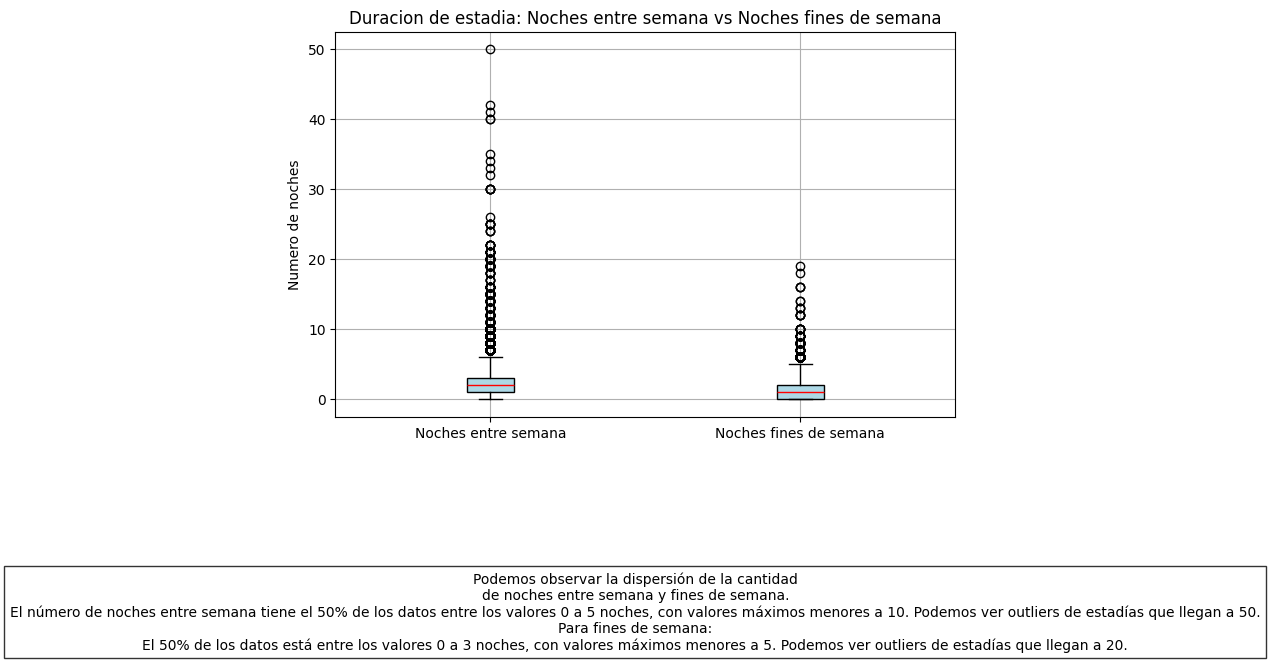

In [94]:
# Visualizacion de la distribucion de las noches entre semana y fines de semanas
stays_data = [df['stays_in_week_nights'], df['stays_in_weekend_nights']]

plt.figure(figsize=(8, 5))
plt.boxplot(stays_data, tick_labels=['Noches entre semana', 'Noches fines de semana'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Duracion de estadia: Noches entre semana vs Noches fines de semana')
plt.ylabel('Numero de noches')
plt.grid(True)

plt.figtext(0.5, -0.2,  # x=0.5 for center alignment, y=-0.2 to position it below the plot
            'Podemos observar la dispersión de la cantidad\n'
            'de noches entre semana y fines de semana.\n'
            'El número de noches entre semana tiene el 50% de los datos entre los valores 0 a 5 noches, con valores máximos menores a 10. Podemos ver outliers de estadías que llegan a 50.\n'
            'Para fines de semana:\n'
            'El 50% de los datos está entre los valores 0 a 3 noches, con valores máximos menores a 5. Podemos ver outliers de estadías que llegan a 20.',
            fontsize=10, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

#Codigo base: Coding dojo, visualizaciones avanzadas

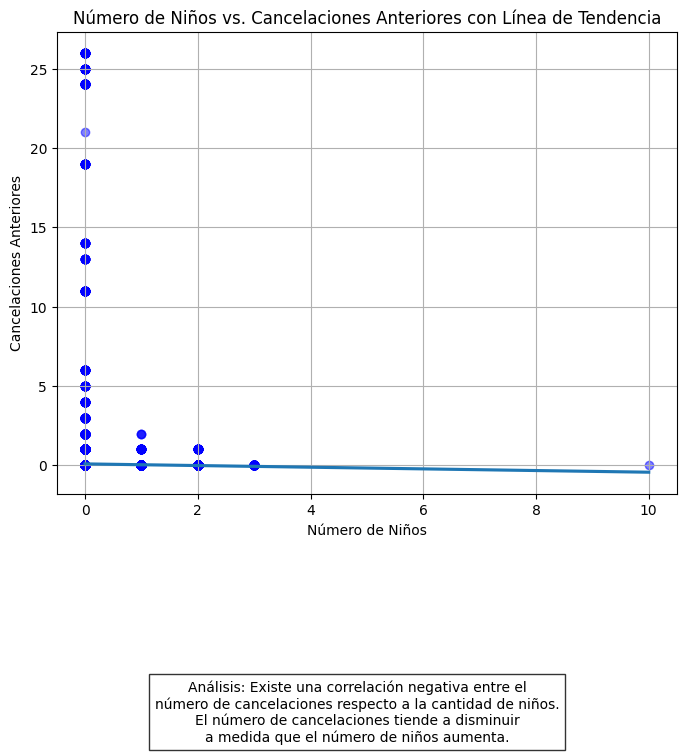

El coeficiente de correlacion entre Numero de canelaciones y miños es: -0.02


In [107]:
plt.figure(figsize=(8, 6))
sns.regplot(x='children', y='previous_cancellations', data=df, scatter_kws={'alpha':0.5, 'color':'blue'})
plt.title('Número de Niños vs. Cancelaciones Anteriores con Línea de Tendencia')
plt.xlabel('Número de Niños')
plt.ylabel('Cancelaciones Anteriores')
plt.grid(True)

# Añadir analisis
plt.figtext(0.5, -0.2,  
         'Análisis: Existe una correlación negativa entre el\n'
         'número de cancelaciones respecto a la cantidad de niños.\n'
         'El número de cancelaciones tiende a disminuir\n'
         'a medida que el número de niños aumenta.', 
         fontsize=10, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.8))

# Añadir una línea de tendencia 
z = np.polyfit(df['children'].dropna(), df['previous_cancellations'].dropna(), 1)  # Drop NaN values
p = np.poly1d(z)
plt.show()

# Calculate correlation coefficient
correlation = df['children'].corr(df['previous_cancellations'])
print(f"El coeficiente de correlacion entre Numero de canelaciones y miños es: {correlation:.2f}")

#Codigo base: Instructos durante clase de visulizacion avanzada y correlacion

In [115]:
# Vemos si existen mas resevar familiares o no Familiares. Asumimos que familiar es cuando Children es mayor a 0
def reservas_familiares(row):
    return row['children'] > 0  

df['reservas_familiares'] = df.apply(reservas_familiares, axis=1)

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], 
                                           categories=["January", "February", "March", "April", "May", 
                                                       "June", "July", "August", "September", 
                                                       "October", "November", "December"], 
                                           ordered=True)

# Grouping by month and family booking status
reservas_familiares_mesese = df.groupby(['arrival_date_month', 'is_family_booking']).size().unstack(fill_value=0)

print(reservas_familiares_mesese)

is_family_booking   False  True 
arrival_date_month              
January              5613    316
February             7503    565
March                9308    486
April               10310    779
May                 11234    557
June                10216    723
July                11047   1614
August              11930   1943
September           10118    390
October             10671    489
November             6590    204
December             6256    524


C:\Users\arace\AppData\Local\Temp\ipykernel_26348\1919854857.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reservas_familiares_mesese = df.groupby(['arrival_date_month', 'is_family_booking']).size().unstack(fill_value=0)


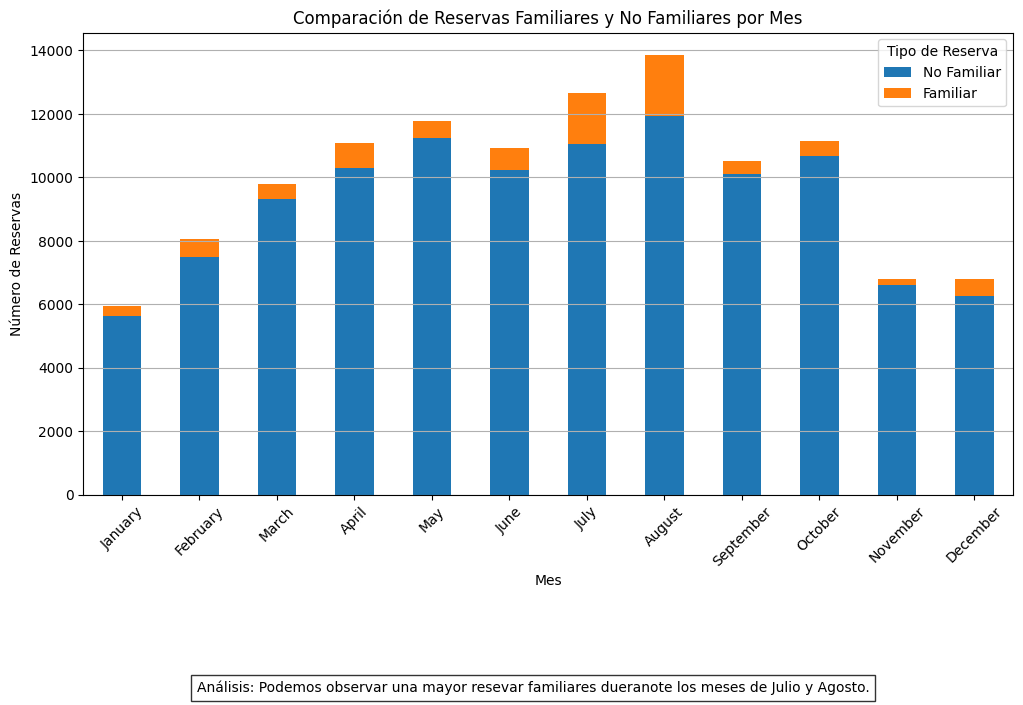

In [118]:
reservas_familiares_mesese.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Comparación de Reservas Familiares y No Familiares por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Reserva', labels=['No Familiar', 'Familiar'])
plt.grid(axis='y')
plt.figtext(0.5, -0.2,  
         'Análisis: Podemos observar una mayor resevar familiares dueranote los meses de Julio y Agosto.', 
         fontsize=10, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

Análisis adicional:

* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [73]:
# Estadistica descriptiva:
estadistica_descriptiva = df.describe()
variance = nuevo_df.var(numeric_only=True)
# Range (Max - Min)
range_values = nuevo_df.max(numeric_only=True) - df.min(numeric_only=True)

In [74]:
# Ordenamos los datos e imprimimos
print("Resumen estadístico básico:\n",estadistica_descriptiva)

Resumen estadístico básico:
          is_canceled      lead_time  arrival_date_year  \
count  119386.000000  119386.000000      119386.000000   
mean        0.370395     104.014801        2016.156593   
std         0.482913     106.863286           0.707456   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119386.000000              119386.000000   
mean                  27.165003                  15.798553   
std                   13.605334                   8.780783   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%           

In [70]:
# Imprimir la varianza
print("\nVarianza de las variables numéricas:\n", variance)


Varianza de las variables numéricas:
 is_canceled                           0.233188
lead_time                         11415.306473
arrival_date_year                     0.500410
arrival_date_week_number            185.109863
arrival_date_day_of_month            77.101579
stays_in_weekend_nights               0.997254
stays_in_week_nights                  3.641506
adults                                0.239782
children                              0.158866
babies                                0.009495
is_repeated_guest                     0.030898
previous_cancellations                0.712998
previous_bookings_not_canceled        2.242615
booking_changes                       0.425548
agent                             11450.243944
days_in_waiting_list                309.614974
adr                                2552.966392
required_car_parking_spaces           0.060175
total_of_special_requests             0.628559
dtype: float64


In [76]:
# Imprimir el rango
print("\nRango (Max - Min) de las variables numéricas:\n", range_values)


Rango (Max - Min) de las variables numéricas:
 is_canceled                          1.00
lead_time                          737.00
arrival_date_year                    2.00
arrival_date_week_number            52.00
arrival_date_day_of_month           30.00
stays_in_weekend_nights             19.00
stays_in_week_nights                50.00
adults                              10.00
children                            10.00
babies                              10.00
is_repeated_guest                    1.00
previous_cancellations              26.00
previous_bookings_not_canceled      72.00
booking_changes                     21.00
agent                              536.00
days_in_waiting_list               391.00
adr                               5406.38
required_car_parking_spaces          8.00
total_of_special_requests            5.00
dtype: float64
